In [1]:
# Importing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# getting file
os.chdir('C:\\Users\\Khizar\\Desktop\\Semester - Spring 2021\\5 - Machine Learning 4375\\CSV')
path = os.getcwd()
path

# Setting datafram
df = pd.read_csv('penguins_size.csv')

In [2]:
# Checking columns
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

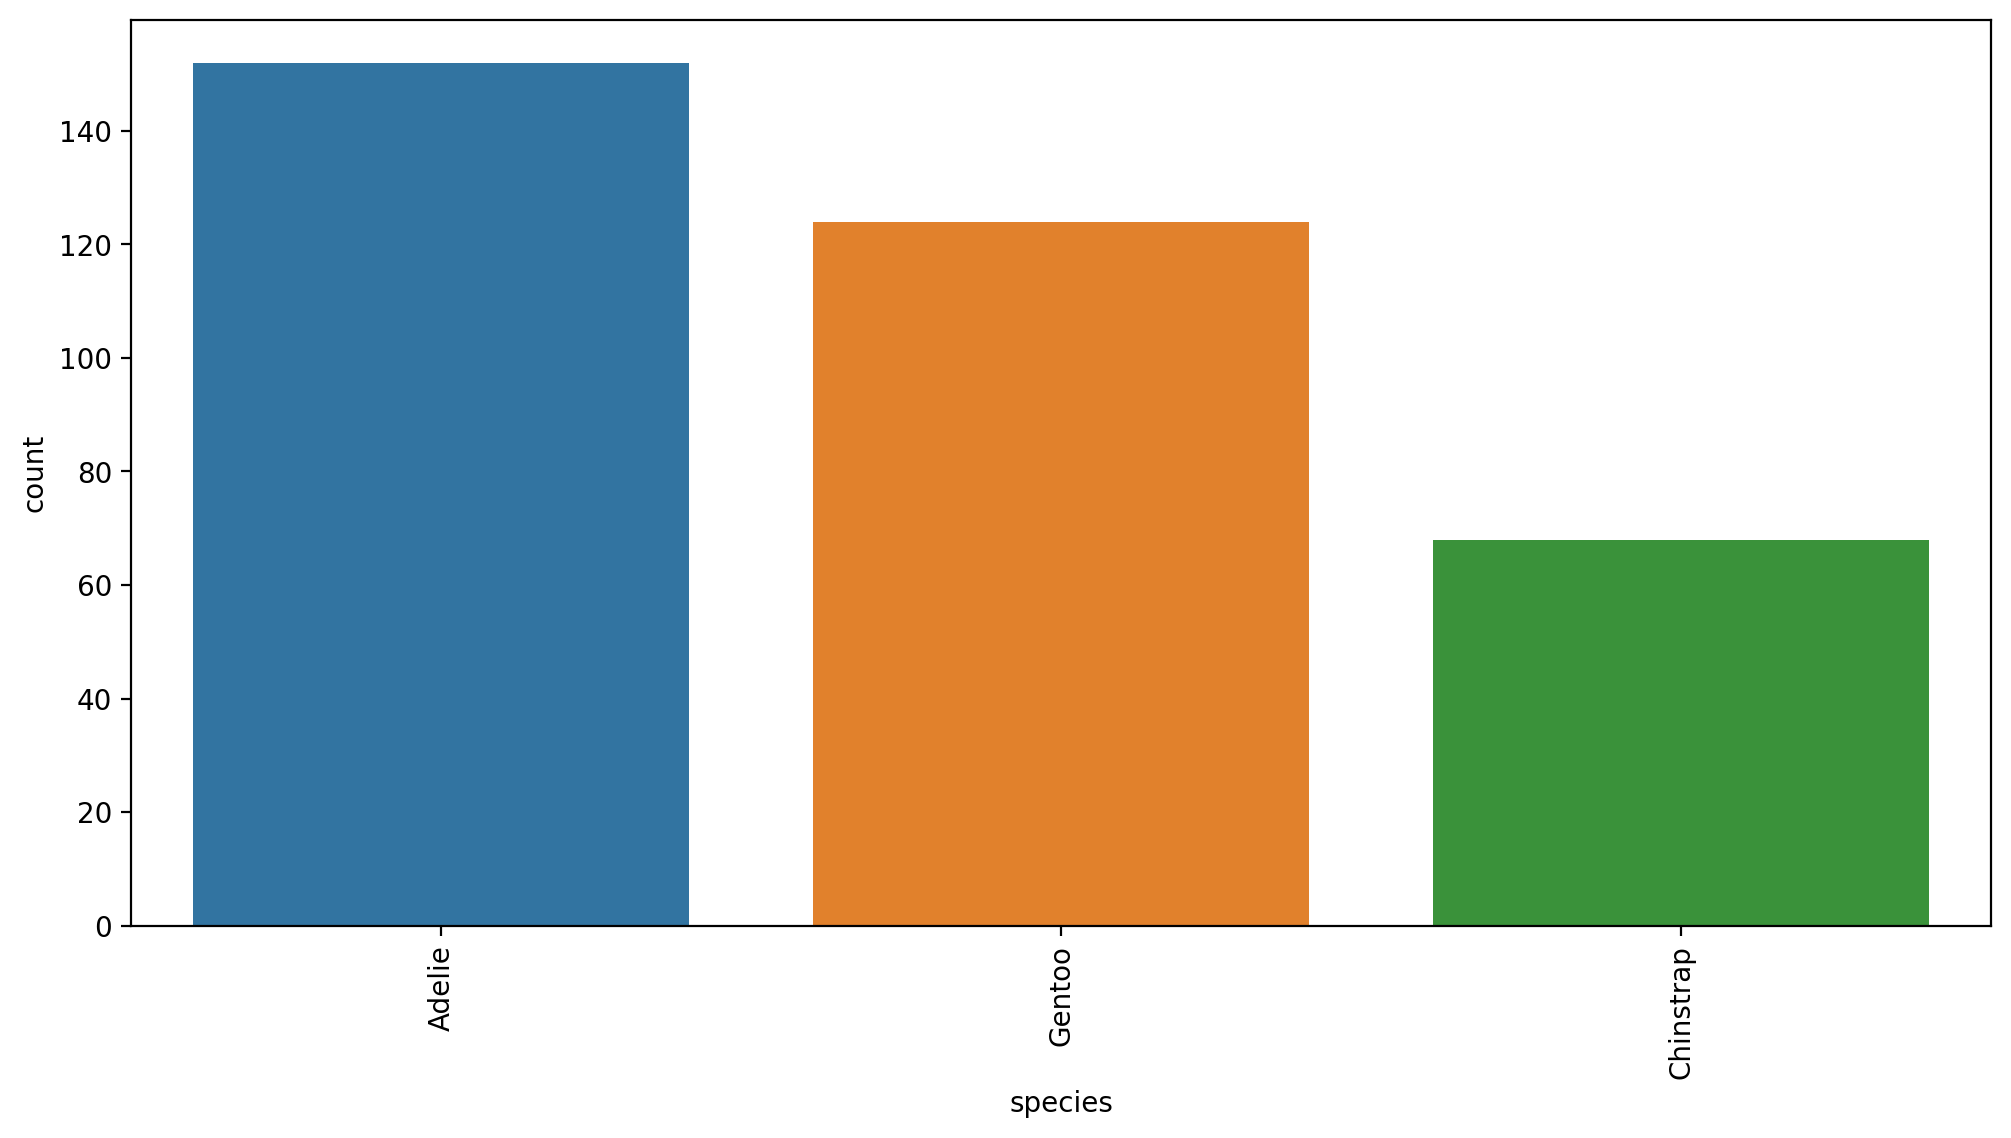

In [3]:
# checking how many species and counting them
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='species', order=df['species'].value_counts().index)
plt.xticks(rotation=90);

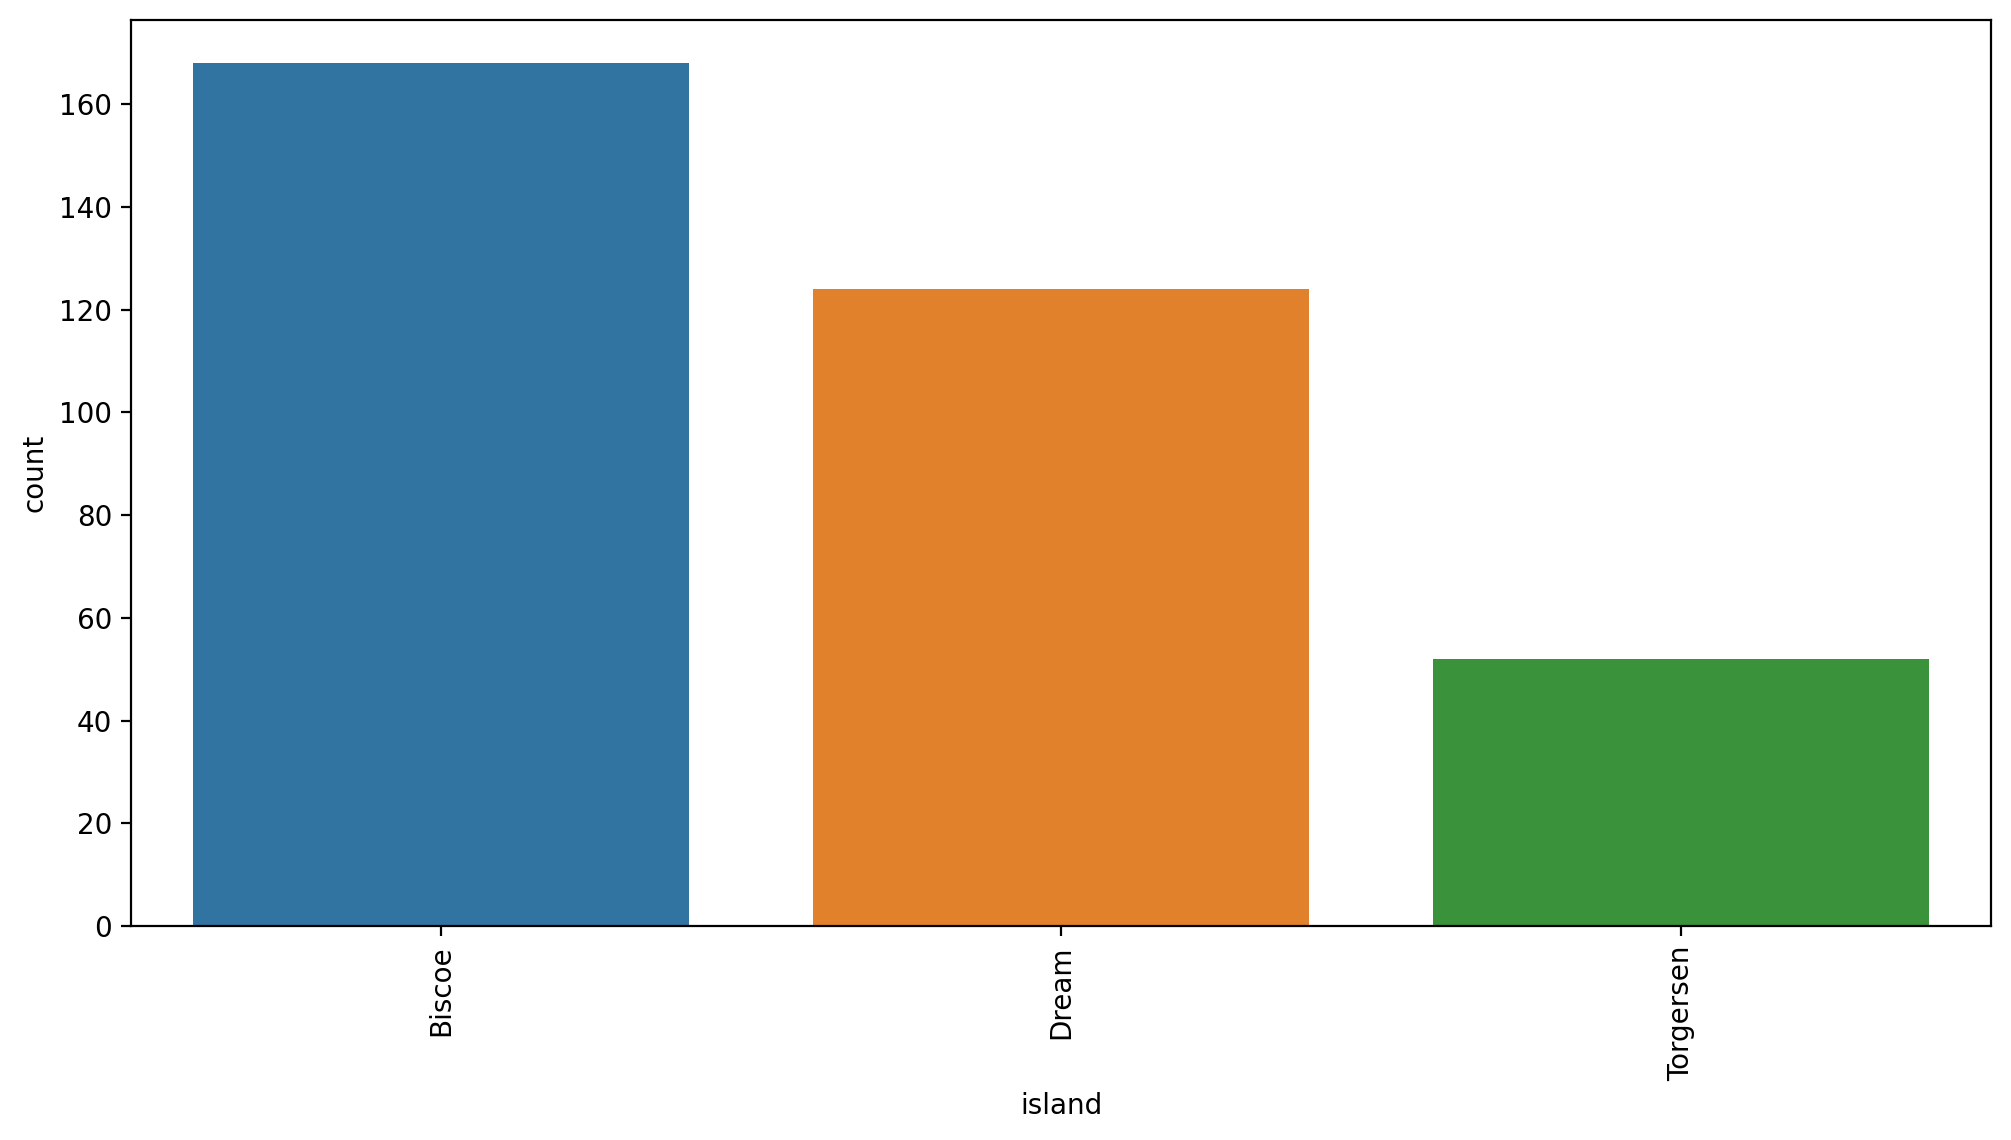

In [4]:
# Checking number of islands and counting them
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='island', order=df['island'].value_counts().index)
plt.xticks(rotation=90);

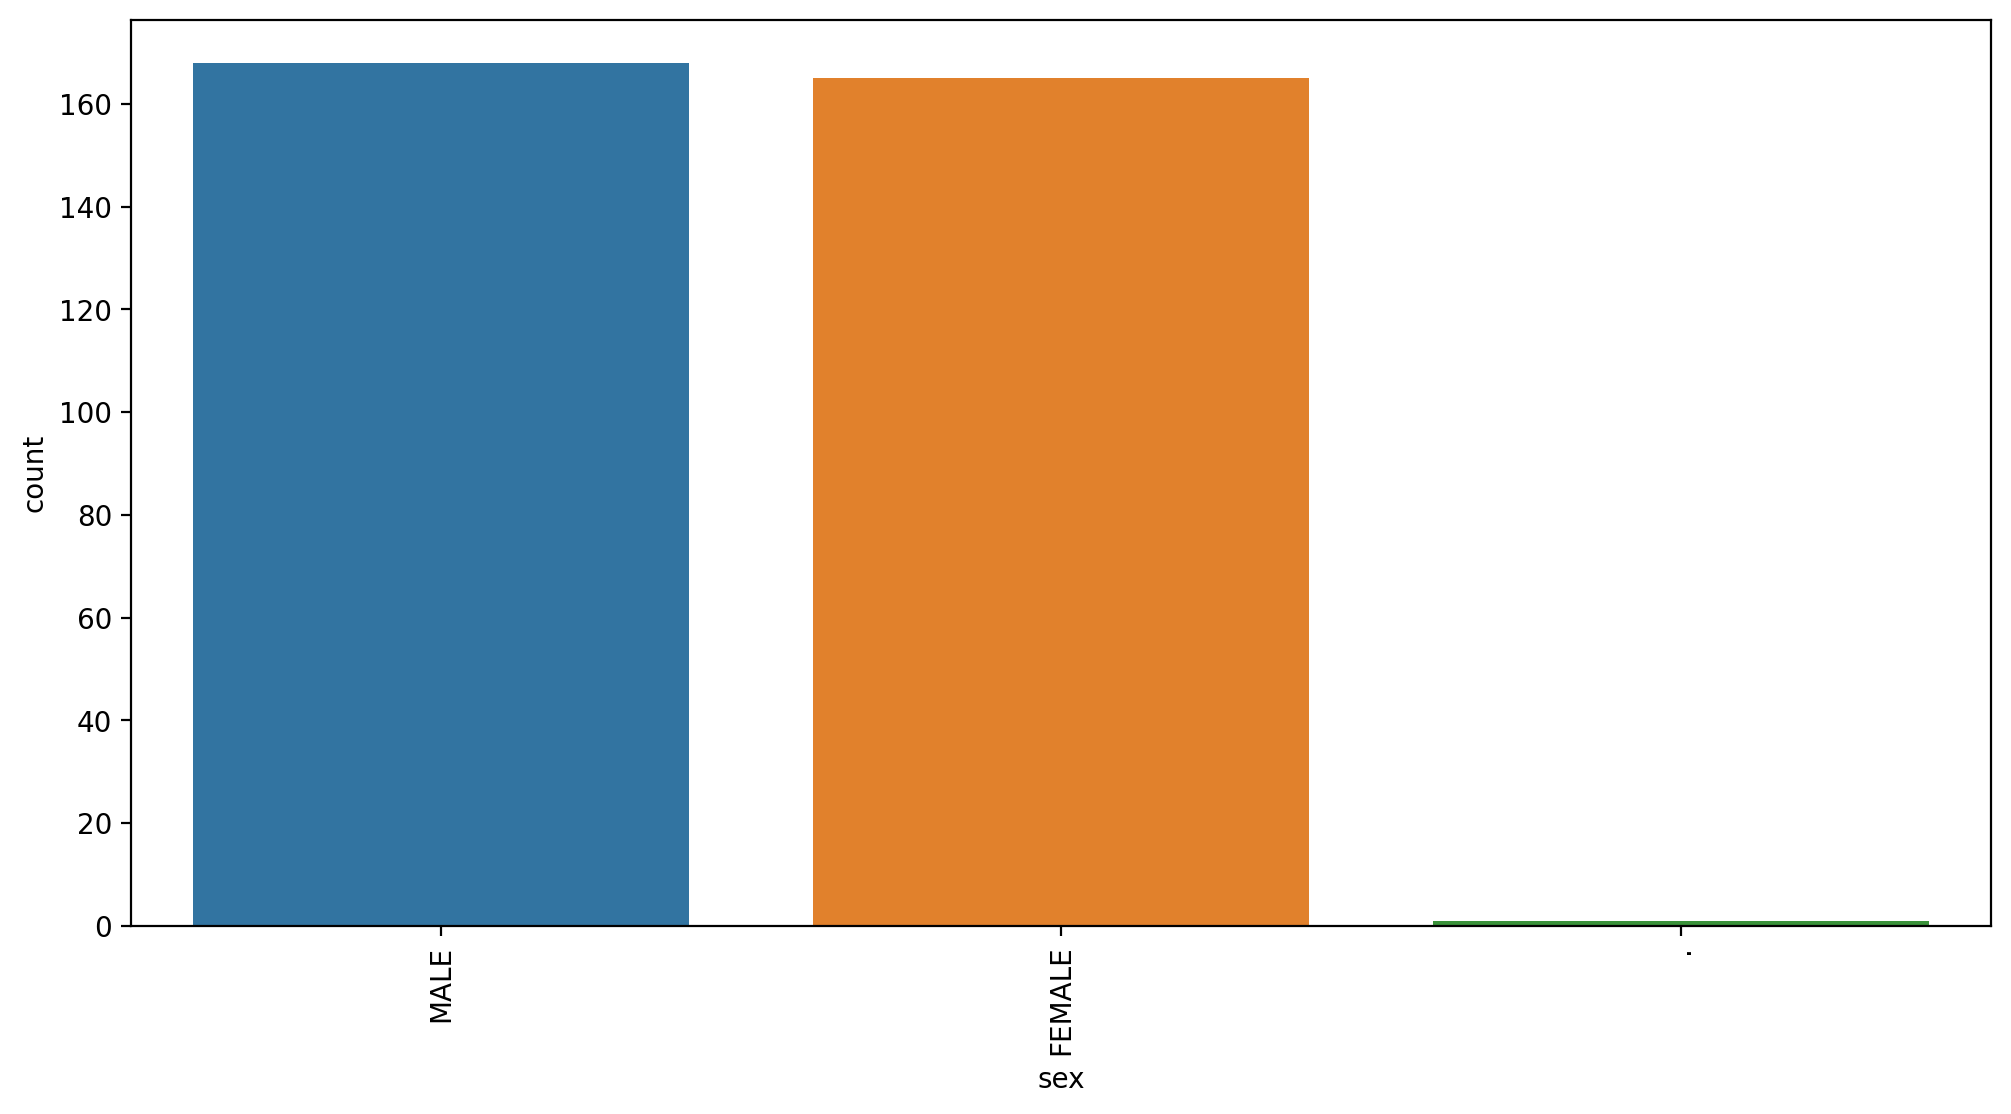

In [5]:
# Checking # of males and females
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='sex', order=df['sex'].value_counts().index)
plt.xticks(rotation=90);

In [6]:
# Dropping null values
df = df.dropna()

In [7]:
# Getting dummy data and seting x
x = pd.get_dummies(df)

In [8]:
x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_.,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,0,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,0,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,0,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,0,1


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)

In [10]:
cluster_labels = model.fit_predict(scaled_x)

In [11]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
x['Cluster'] = cluster_labels

<AxesSubplot:>

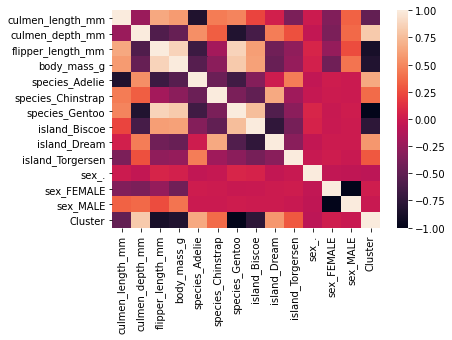

In [13]:
# checking corellation on heatmap
sns.heatmap(x.corr())

<AxesSubplot:>

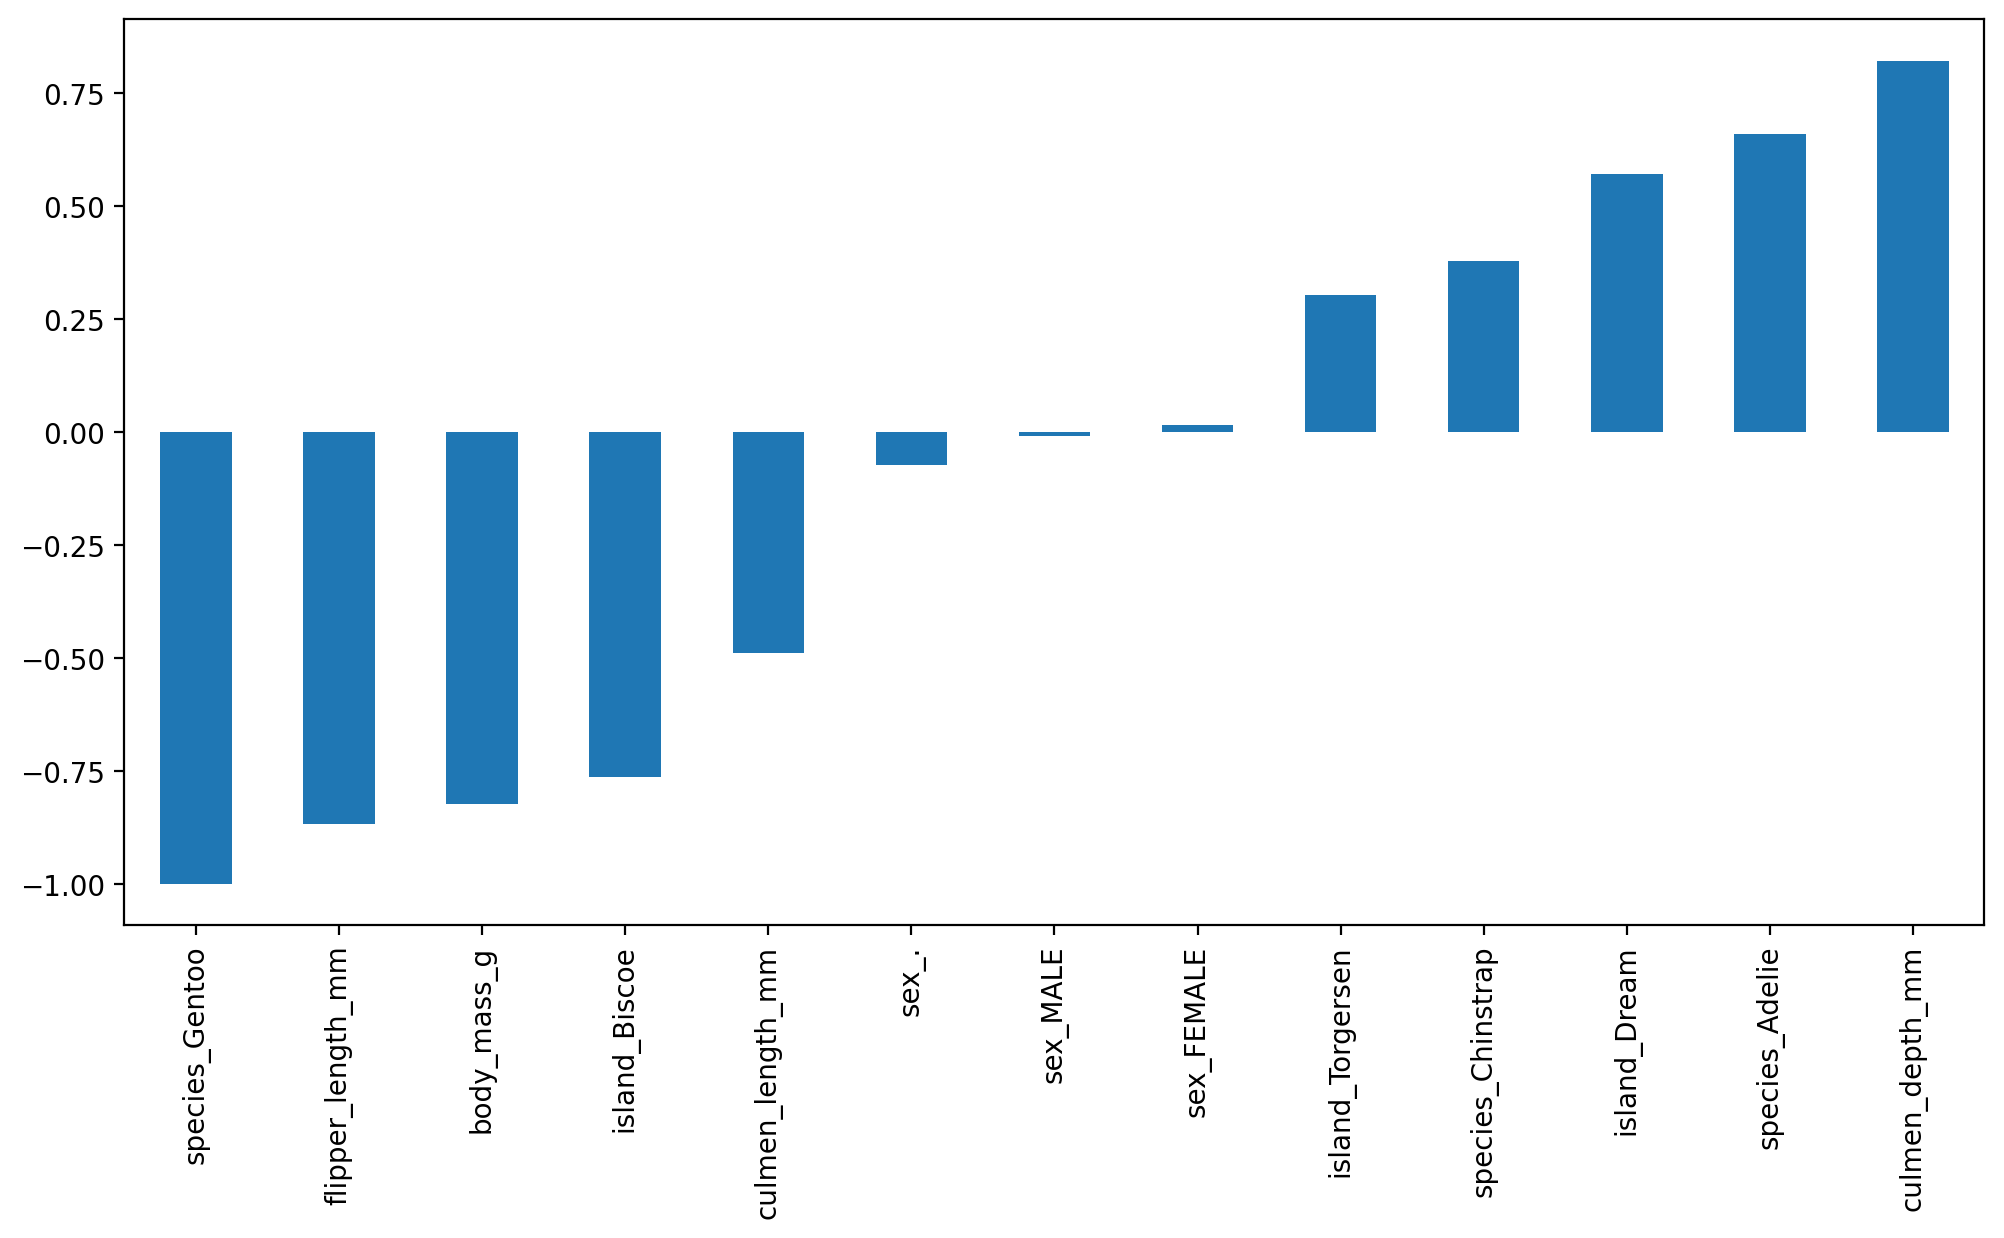

In [14]:
# bar graph
plt.figure(figsize=(12,6), dpi = 200)
x.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [15]:
# for loop for ks from 2-10
ssd = []
for k in range(2,10):
    model = KMeans(n_clusters = k)
    
    model.fit(scaled_x)
    
    ssd.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared Distances')

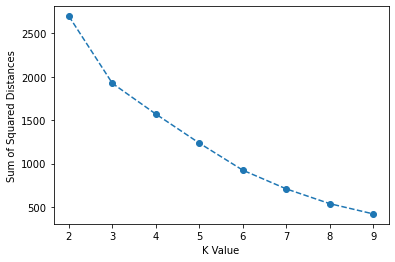

In [16]:
# Plotting graph for ks between 2-10 
plt.plot(range(2,10), ssd, 'o--')
plt.xlabel("K Value")
plt.ylabel( "Sum of Squared Distances")